In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [54]:
x_train = pd.read_csv("./dataset2/input.csv")
y_train = pd.read_csv("./dataset2/labels.csv")
x_test = pd.read_csv("./dataset2/input_test.csv")
y_test = pd.read_csv("./dataset2/labels_test.csv")

In [55]:
x_train.shape , y_train.shape ,  x_test.shape , y_test.shape

((1999, 30000), (1999, 1), (399, 30000), (399, 1))

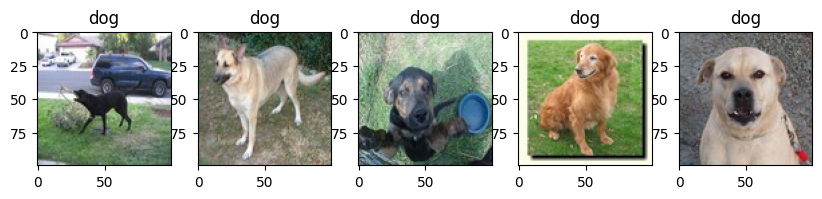

In [56]:
plt.figure(figsize=(10, 2))
for i in range(5):
    img = x_train.iloc[i].to_numpy().reshape(100, 100, 3).astype('uint8')
    label = y_train.iloc[i].to_numpy()
    if label == 0:
        label = "dog"
    else:
        label = "cat"
    plt.subplot(1, 5, i+1)
    plt.title(label)
    plt.imshow(img)

In [57]:
x_train = x_train.to_numpy().reshape(-1, 100, 100, 3)/255.0
x_test = x_test.to_numpy().reshape(-1, 100, 100, 3)/255.0

In [58]:
x_train.shape , x_test.shape

((1999, 100, 100, 3), (399, 100, 100, 3))

In [59]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [60]:
y_train.shape , y_test.shape

((1999, 1), (399, 1))

In [61]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

D:\BE-IT-Practicals\DL\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       2,166,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,186,305 (8.34 MB)

 Trainable params: 2,186,305 (8.34 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.5079 - loss: 0.7894 - val_accuracy: 0.5038 - val_loss: 0.6922
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.5380 - loss: 0.6900 - val_accuracy: 0.6040 - val_loss: 0.6685
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.6619 - loss: 0.6325 - val_accuracy: 0.6366 - val_loss: 0.6320
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.7286 - loss: 0.5618 - val_accuracy: 0.6642 - val_loss: 0.6147
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.7799 - loss: 0.4678 - val_accuracy: 0.6591 - val_loss: 0.6450
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.8427 - loss: 0.4028 - val_accuracy: 0.6892 - val_loss: 0.6901
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.8703 - loss: 0.3029 - val_accuracy: 0.6692 - val_loss: 0.7946
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.9172 - loss: 0.2021 - val_accuracy: 0.6566 - v

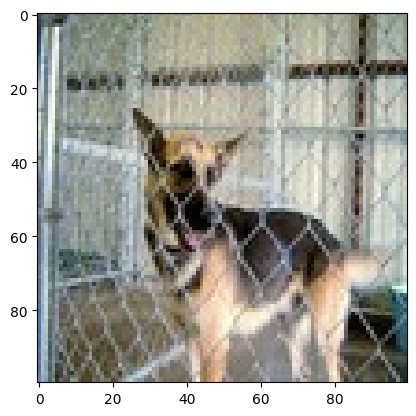

In [65]:
idx = random.randint(0, len(x_test)-1)
plt.imshow(x_test[idx])

In [66]:
pred = model.predict(x_test[idx].reshape(1, 100, 100, 3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


In [67]:
pred

array([[0.00092522]], dtype=float32)

In [68]:
if pred > 0.5:
    print("cat")
else:
    print("dog")

dog


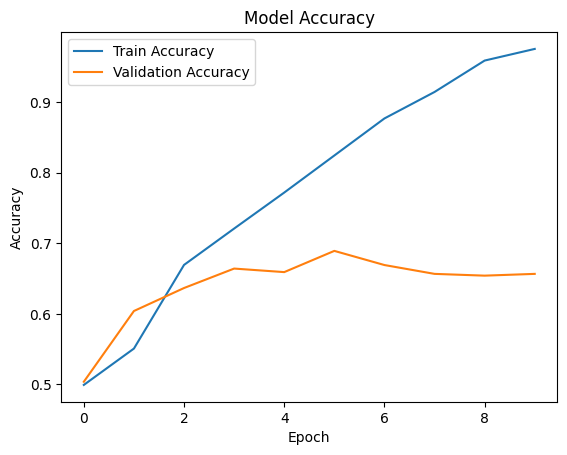

In [69]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

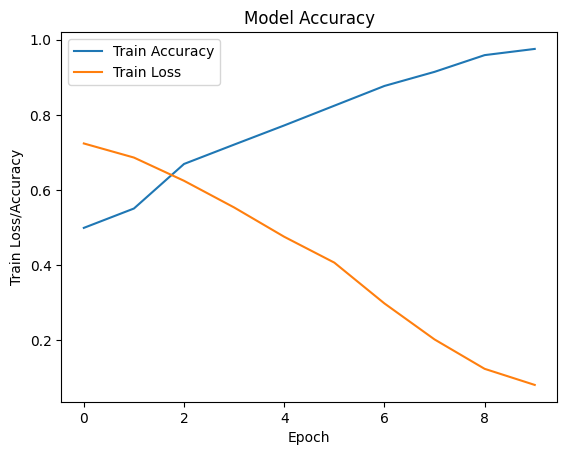

In [70]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Model Accuracy')
plt.ylabel('Train Loss/Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()